# Titan Radiative Transfer Models

## Probably Should Have Dug Into this a While Ago

### Gotta know the competition, after all..

As one of my primary research focuses is Radiative Transfer on Titan (specifically in the Near InfraRed (NIR)), I should probably know how it's done in places BESIDES the code I work on, SRTC++. Where did all the information come from? How does it work? What do the other codes have? Well, it's time to fully dig into that and uncover the answers. In the end I hope to have a nice neat table listing differences, and perhaps a flowchart that dictates where things went and why.

For now, though, at the suggestion of Dr. Barnes, the list I need is in one source: Es-Sayeh et al. 2023. And indeed, the citation list is rather immediate:

```
RT models in the NIR for Titan have been developed for decades (e.g., McKay et al. 1989; Griffith et al. 1991, 2003, 2012; Rannou et al. 1995, 2003, 2016, 2021; Ádámkovics et al. 2004, 2009, 2016; Adriani et al. 2005; Negrão et al. 2006; Hirtzig et al. 2013; Barnes et al. 2018; Corlies et al. 2021; Coutelier et al. 2021)
```

So these are our investigation points. We shall find what each of the codes are called (if anything) and store them here at the top.

**McKay**

**Griffith**

**Rannou**: "Rannou's Model"

**Adamkovics**

**Adriani**: libRadtran: DISORT

**Negrao**

**Hirtzig**

**Barnes**: SRTC++

**Corlies**

**Coutelier**

**Es-Sayeh**

Since Es-Sayeh is not on his own list, we have to track down his papers for the code chronologically. The one we have here is 2023, but it's a revised version. 

```
The general architecture of our RT model for Titan is directly inherited from the model presented in detail in Hirtzig et al. (2013), including a few, but significant updates regarding the gas and aerosol descriptions, leading to a version that stabilized in 2016 (Maltagliati et al. 2015a; Cornet et al. 2017; Rodriguez et al. 2018),
```

So Hirtzig provides the origin for this one, which itself can probably be traced back. However, the oldest year here is 1989 McKay, so we shall start there (if we can).

# McKay et al. 1989

## The Thermal Structure of Titan's Atmosphere

### The Beginning

https://zenodo.org/records/1253902

Timeframe note: this is after the Voyager missions, but long before Cassini/Huygens arrived (2004). While there was work done before McKay, largely pre-Voyager it seems, this appears to be the first paper with a "detailed numerical model."

The results of the simulation are a temperature profile of Titan and a handful of other results, but all of them are "one dimensional", that is, they care only about altitude and whatever value is at that altitude. A good first start for numerical simulation. The program appears to have no name, though, which is annoying.

The actual simulation is a 30 layer plane-parallel geometry setup with an attempt at a minimum number of free parameters, run for both with and without methane clouds (which they conclude changes little about the temperature profile anyway). Layer thickness is not uniform, with higher layers being wider. It handles both visible and IR, but for some reason seems to skip values between 2.3 um and 10 um, possibly because the goal is temperature profile and not visual replication. 

The model's primary method of working is relaxation based: start with an atmosphere model from Voyager, then relax the temperature profile until we get zero net flux across each individual layer. Gasses and haze are adjusted based on how the temperature adjusts. It then just keeps going until the result stabilizes. An interesting result of this is that the atmosphere model is not static, it adjusts until it reaches equilibrium.

The actual solution of the radiative transfer equations is done with the two-stream method. Methane is the only absorber considered. Surface is assumed lambertian, naturally.

This was our humble beginning. (For the record, the actual model and math used appears to come from Toon, but that wasn't applied to Titan...? Maybe investigate later, Rannou mentions it as well). Toon investigation was a dead end, and the first paragraph of model description has no sources. Toon does seem to provide HAZE values, but not the radiative transfer itself. There are sources for the radtran math later, but there's several, not a single or even some major sources; and most of the sources are just numbers. So... yep. This is our origin, as it is unaware of the "bonus" origin we have at the bottom.


# Griffith et al. 1991

## Titan's Surface and Troposphere, Investigated with Ground-based Near-infrared Observations

### Another of the ancients.

https://www.sciencedirect.com/science/article/abs/pii/001910359190219J?via%3Dihub

So this one is not freely accessible, all I have is the abstract and references. The abstract does not indicate that it's a radiative transfer model, though, so perhaps it was cited incorrectly? 


# Rannou et al. 1995

## Titan's Geometric Albedo: Role of the Fractal Structure of the Aerosols

### Oh hey I think I know the concept in this one! The fractal dimension!

https://www.sciencedirect.com/science/article/pii/S0019103585711967?via%3Dihub

I have access to this one and the abstract mentions radiative transfer, we are good to go! As expected, it cites McKay's paper, but notably not Griffith's. 

This model is similar, but it has equally sized levels and 50 of them. The main addition of this paper is that it factors in the fact that the aerosols (haze) are fractal aggregate particles with a fractal dimension. The main number extracted is Titan's geometric albedo, rather than thermal profile. Details of the model are not given, but what is given seems similar to McKay

# Griffith et al. 2003

## Evidence for the Exposure of Water Ice on Titan's Surface

### Let's see if Griffith gives us something this time...

https://www.science.org/doi/10.1126/science.1081897

I do actually have access to this one, but I did have to make an account to get it. Lameness.

Well. A radiative transfer model was used, but we don't get to see it. It doesn't seem to rely on MkKay or Toon though, relying instead on Stamnes et al. 1988, which is a generic algorithm for radiative transfer. Perhaps these "origins" papers could be looked into later...

# Rannou et al. 2003

## A Model of Titan's Haze of Fractal Aerosols Constrained by Multiple Observations

### This seems like a sequel to the previous Rannou paper...

https://www.sciencedirect.com/science/article/pii/S0032063303001284?via%3Dihub

Finally discussion of non one-dimensional effects. Again, this paper is not actually about the model used. So far only the original paper has been about *that*. Interesting comparisons (and arguments) about fractal vs. sphere geometries. Eeyep.


# Ádámkovics et al. 2004

## Spatially-resolved Spectroscopy at 1.6 um of Titan's Atmosphere and Surface

### Looks like it's not a radtran, but oh wait it is. Also, welcome to the New Millenium.

https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2004GL019929

This one is mostly a new obesrvation, but it does use a radtran model to fit the data, relying on McKay's 2-stream plane-parallel model. It also gives an  optical depth uncertainty of ~20%, fun. The model itself isn't important and is basically not described.


# Adriani et al. 2005

## Titan's Ground Reflectance Retrieval from Cassini-VIMS Data Taken During the July 2nd, 2004 Fly-by at 2 AM UT

### And now it's finally time to use some Cassini data. 

https://link.springer.com/article/10.1007/s11038-005-9057-3

Attempting to line it up with real data. Of course, assuming a flat lambertian surface, heh. Specific programs are brought in: libradtran and DISORT 2.0. 

This paper openly addresses McKay and Rannou as the ones that came before, McKay setting up the model, and Rannou adding fractal aggregates to the atmosphere. However, it complains that the radiative model is insufficient and needs to be improved for comparing to the actual VIMS data. libRadtran can choose many solvers, one of them is DISORT, from STamnes et al 1988 (oooooooh that was mentioned previously!) DISORT is the primary object of interest here; it gets rid of microphysical needs and only asks for scattering albedo, optical thickness, and phase function moments. The Discrete Ordinate Method (DOM) is used to actually solve the radtran equations. As we are solving them we are still deterministic. 

The weakness of plane parallel is mentioned: fails at large angles. Angles for this were restridcted to 70 degrees.

*GASP* A FLOWCHART

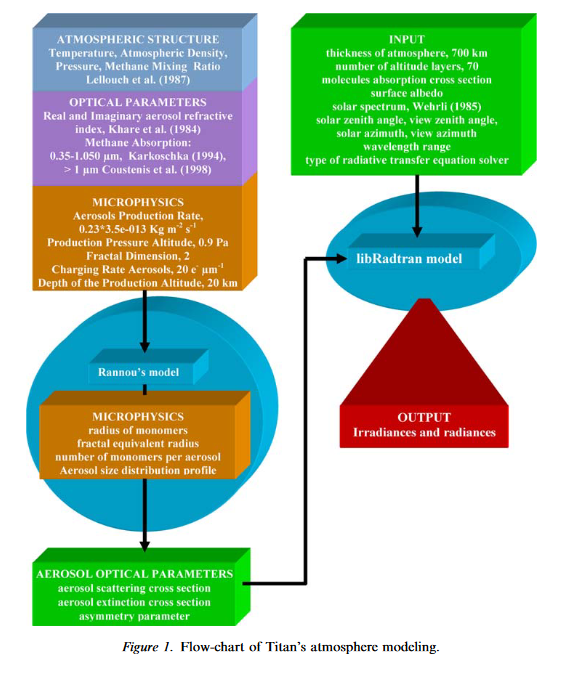

Now nice... anyway clearly the big players here are McKay and Rannou, even if Rannou often doesn't describe the model. We happen to know that one of the big ones is claled PyDisort, though...

# Negrão et al. 2006

## Titan's Surface Albedo Variations Over a Titan Season from Near-infrared CFHT/FTS Spectra

### Strangely NOT using Cassini data, huh.

https://www.sciencedirect.com/science/article/pii/S003206330600136X?via%3Dihub

Mentions, right away, using Rannou's model from 2003, just updated. Updated how? 

Does a better job explaining Rannou then Rannou does, also the distinction between Rannou and McKay. Maybe revisit Rannou 2003 for a closer look?

Hey, we've finally hit the 70 atmospheric layers! Woo! 

The model itself doesn't appear to be any different, it merely adds more recent data.

# Rodriguez et al. 2006

## Cassini/VIMS Hyperspectral Observations of the HUYGENS Landing Site on Titan

### Had to go back to do this one, time travel!

https://hal.science/hal-00399946v2/file/Rodriguez-et-al._2006_Titan_Huygens.pdf

Why was this cited as a radiative transfer paper? It menisons a code, but all it does is say it needs a priori knowledge. Hmm. 

# Ádámkovics and Pater 2009

## Spatially-resolved Spectroscopy at 1.6 um of Titan's Atmosphere and Surface

### Looks like it's not a radtran, but oh wait it is. Also, welcome to the New Millenium.

https://arxiv.org/pdf/0907.2255

First indication of physical variations across different locations on the surface--Xanadu has its own special thing now. Though this one has only 16 layers, but is still a 2-stream thing. It is *pseudo*-plane-parallel though, whatever that means.

That *pseudo* part is actually pretty incredible as it gives us the first actual images of full disc simulated Titan. It works... alright, actually. What exactly is a pseudo-plane-parallel model, though? The details are not discussed here, indicating that maybe it's outlined in the Stamnes paper? That Stamnes paper is real important but not Titan related huh...



# Griffith et al. 2012

## Radiative Transfer Analyses of Titan's Tropical Atmosphere

### Is Griffith gonna give us an actual model this time?

https://www.sciencedirect.com/science/article/pii/S0019103511004611?via%3Dihub

Oh hey using Huygens finally, and "putlicizing" radiative transfer models? This might actually be exactly what we're looking for!

Oh hey the paper goes over the basics of Radiative Transfer, neat!

Explicitly plane-parallell, only for small areas on Titan's surface, so many layers that there is at most one scattering event per layer. Notably NOT the DOM method. 

The doubling and adding method here appears completley unique, compared to the others. This most assuredly handles multiple scatters. This ALSO relies on DISORT though, everything relies on DISORT, hmm.

ANyway for once, yes, Griffith has given us an actual radiative transfer model.


# Xu et al. 2013

## A Hybrid Method for Modeling Polarized Radiative Transfer in a Spherical-shell Planetary Atmosphere

### A.K.A.: The weird one.

https://www.sciencedirect.com/science/article/pii/S0022407312004554?casa_token=SQSTku_Z-jQAAAAA:EVXh34AjjDQo5QOhLXpvu8A4cgST3tLFxTkqB6JVxGrS-DYais2KsxCiNvs6LjbX5PcCO5f2Fms

plane-parallel and pseudo-plane-parallel has been the name of the game so far. Today, though, we have our first spherical shell contender for radiative transfer. This is actually wholly different from everything else discussed so far, and it knows it. Note that it is not a Monte Carlo but Markov chain method. Is that a difference without a distinction? Potentially.

The really nice thing is that this paper *describes* what plane-parallel and pseudo-spherical mean. Neat. It's a wall of mathematical gobledegook, but it's *there*. 

Very interesting, lies outside the rest of the models. But I do have a question: what was it built on? 

 # Hirtzig et al. 2013
 
 ## Titan's Surface and Atmosphere from Cassini/VIMS Data with Updated Methane Opacity
 
 ### This one was cited as very important elsewhere, hopefully it holds up.
 
https://www.sciencedirect.com/science/article/pii/S0019103513002339?via%3Dihub#s0030
 
This model is based on SHDOM (Spherical Harmonic Discrete Ordinate Method) 70 layers are chosen again, and the lambertian surface is assumed. Notably, this one allso has CIA for nitrogen! and there's molecular line opacity, it certainly looks like this one has expanded from the previous ideas. Notably lacking fluorescence, but those aren't in the windows now are they? (3.3 and 4 um).

Hmm. Doesn't really describe in *detail* what's going on. Shame.



# Maltagliati et al. 2015

## Simultaneous Mapping of Titan's Surface Albedo and Aerosol Opacity from Cassini/VIMS Massive Inversion

### Second time travel, let's see if this one is also seemingly useless.

https://meetingorganizer.copernicus.org/EPSC2015/EPSC2015-687.pdf

This is so brief it tells us nothing. It does use a RT model, but says nothing about it besides the fact that it comes from Hirtzig. Which. Well. See Hertzig 2013 above. 

# Rannou et al. 2016

## Titan's Surface Spectra at the Huygens Landing Site and Shangri-La

### Alright Rannou, are you gonna give us something else?

https://www.sciencedirect.com/science/article/pii/S0019103515004212?via%3Dihub

This one goes into a bit more information about the model. Mentions SHDOMPP. 

WOAH WOAH WOAH a MONTE CARLO METHOD is mentioned related to Toledo et al 2015. Agh so many rabbit holes...

This model contains a "moist surface" option. 

Somewhat infuriating how little the actual model is discussed.

# Ádámkovics et al. 2016

## Meridonial Variation in Tropospheric Methane on Titan Observed with AO Spectrosocpy at Keck and VLT

### Ah yes, gonna be a thing that barely discusses the model, hmm?

https://arxiv.org/pdf/1509.08835

20 layers, evenly spaced in pressure, with a few other layers at different specifications. This one is notably making heavy use of Huygens data. 

FIRST MENTION OF PyDISORT, which comes from CDISORT. But basically no explanation still.


# Cornet et al. 2017

## A Look Toward the Surface: Radiative Transfer Modelling in Titan's Atmosphere Using Cassini/VIMS Data

### Well this is gonna be too short to be useful. 

https://meetingorganizer.copernicus.org/EGU2017/EGU2017-12298.pdf

The only evidence of this source existing is this abstract from Geophysical Research Abstracts. Might have only been presented. Dang. It does mention the use of the SHDOMPP solver. Lots of LUTs (Look Up Tables). 

# Rodriguez et al. 2018

## Observational Evidence for Active Dust Storms on Titan at Equinox

### Funny how this one works...

https://www.nature.com/articles/s41561-018-0233-2#Sec8

I do not have access to the primary article. However, the supplementary material is just available, and THAT has the description of the radiative transfer model. So yay! Openly stated to be an updated version of Hirtzig's so yeah that makes sense. Once again, 70 layers, wooo. Correlated-k coefficients as well. Still though, a lambertian surface is assumed, and it is plane-parallel. (Uses SHDOMPP)



# Barnes et al. 2018

## Spherical Radiative Transfer in C++ (SRTC++): A Parallel Monte Carlo Radiative Transfer Model for Titan

### Hey look, it's ours.

https://iopscience.iop.org/article/10.3847/1538-3881/aac2db/pdf

Even though this is ours and we already know it, it also cites a long list of things that's not the same as Mael's. Fascinating...

Regardless ours is the only one not to make any assuming geometry so far, and aside from the one Monte Carlo approach that isn't DISCUSSED is the only one of its kind. (Also we have specular reflections. Yay!)

(Don't cite this one as part of the "other transfer codes" citations)



# Corlies et al. 2021

## Modeling Transmission Windows in Titan's Lower Troposphere: Implications for Infrared Spectrometers Aboard Future Aerial and Surface Missions

### Oh hey, it's Paul. We like Paul.

https://www.sciencedirect.com/science/article/pii/S001910352030556X?casa_token=xx_hPOpRL7MAAAAA:GHr0sL8hdJC67GPSgC6anfiYcv370CFngBG5Cf8Hk9wQb9x0VfrvJlIC8s56f2Xqy_3JF6VzVT0

This one is rather upfront with it, PyDISORT. With pseudo-spherical correction from Adamkovics 2016, which is up there a bit. This paper does not mention changing the model, though. We do mention correlated k coefficients. 

Paper about window width at various altitudes. Landers could illuminate considerably if they had their own light. 

# Coutelier et al. 2021

## Distribution and Intensity of Water Ice Signature in South Xanadu and Tui Regio

### Forgot to put a tagline here earlier, left an awkward space. Oopsy.

https://www.sciencedirect.com/science/article/pii/S0019103521001469?casa_token=iFKiYuZBtscAAAAA:IKSvLz1DDpRCHDvEXFVS10LqW2ESdcu8efK3agbpBd2ByN-vLlJ1gu5j3X-XznTknsmI0ls5QP4

Oh hey this is the paper that adjusts the fractal dimensions to 2.3. Derived from Rannou's (2010, 2016). The discussion is actually extremely brief aside from that. 

# Rannou et al. 2021

## Convection Behind the Humidification of Titan's Stratosphere

### More of not describing the model I bet...

https://iopscience.iop.org/article/10.3847/1538-4357/ac2904/pdf

This one mentions Coutelier et al, so it probably goes last of the 2021 citations. 

Tailored specifically for occultation data. This paper, in and of itself, seems rather useless, admittedly.

# Es-sayeh et al. 2023

## Updated Radiative Transfer Model for Titan in the Near-infrared Wavelength Range: Validation AGainst Huygens Atmospheric and Surface Measurements and Application to the Cassini/VIMS Observations of the Dragonfly Landing Area.

### And thus we have returned to modern times

https://iopscience.iop.org/article/10.3847/PSJ/acbd37/meta#fnref-psjacbd37bib104

This was our primary source for this entire mess. IT admits that it was crafted from Rodriguez 2018, which has a chain that goes back to Hirtzig, primarily. We call the name RT-IPGP-2022, while RT-IPGP-2016 was the old one. Even now, though, a lambertian surface is assumed. Mixes the use of SHDOMPP and SPS-DISORT from plane paralell to pseudo spherical based on the angle, but still can't handle high angles of incidence or anything of the sort.

There is no grand-scoping difference between this version and the last, but this one does spell out what exactly is going on a lot clearer.

# BONUS: THE ORIGINATING NON-TITAN PAPERS EVERYONE LIKES!

## Stamnes et al. 1988

### Numerically Stable Algorithm for Discrete-Ordinate-Method Radiative Transfer in Multiple Scattering and Emitting Layered Media

https://opg.optica.org/ao/fulltext.cfm?uri=ao-27-12-2502&id=31467

This paper is the origin of DISORT (Discrete Ordinate Radiative Transfer). Not that it calls it DISORT here, but it's referred to as such by our friends above. This radiative transfer model has nothing to do with Titan and is completely general so it can be applied to just about anything. As this is what a large number of the other models are built on, let's investigate closer.

The exact mechanics are not exactly clear, it's all HEAVY math, but it's clearly a deterministic method using an accurate approcximation (The DOM method). Notably DISORT is plane-paralell only. 

## Evans 2007

### SHDOMPPDA: A Radiative Transfer Model for Cloudy Sky Data Assimilation 

https://journals.ametsoc.org/view/journals/atsc/64/11/2006jas2047.1.xml

Another non-Titan oriented code that was adapted into things later. Also it has an amazing name.

## Buras et al. 2011

### New Secondary-scattering Correction in DISORT with Increased Efficiency for Forward Scattering

https://www.sciencedirect.com/science/article/pii/S0022407311001385?via%3Dihub

Improvement on DISORT in C. 

# FLOWCHART TIME

## Let's see how this all flows together...

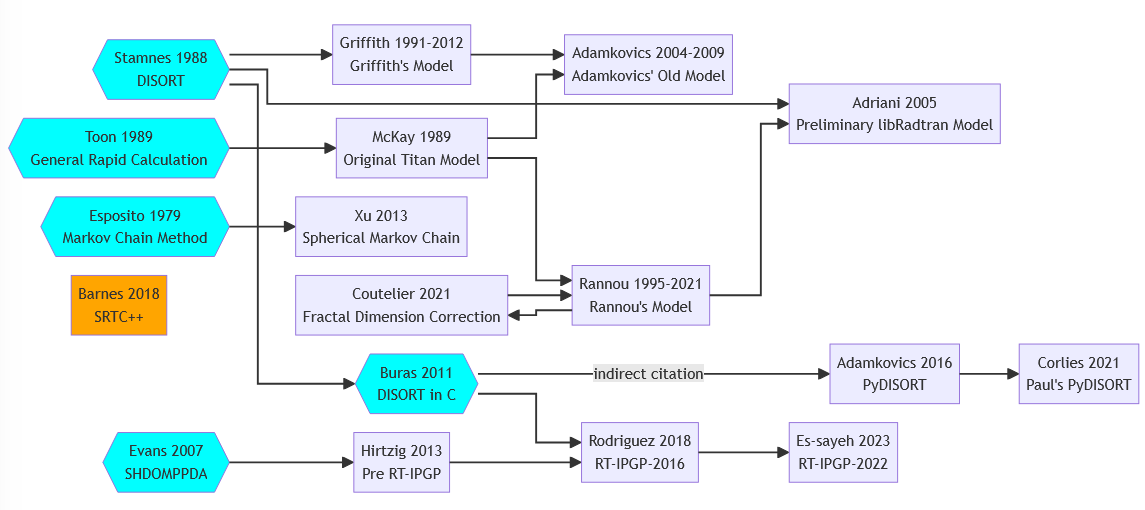

First of all, only Xu and Barnes are not connected to other models on this diagram, everything else is part of the web. The most fundamental and frequently-cited source is DISORT, used in all number of models, and combined with others to be improved over time. The big ones appear to be SRTC++, RT-IPGP-2022, and PyDISORT. Rannou's model continues to see updates as well. Xu's and Griffith's also seem substantial enough to warrant noting, and then there's McKay as the first one. 

Time for citations...